In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time


Problem - 1: Perform a classification task with knn from scratch.

In [ ]:
diabetes_df = pd.read_csv('/content/drive/MyDrive/Concepts and Technologies of AI/diabetes_.csv')
print("Dataset Shape:",diabetes_df.shape)
print("\nFirst 5 rows:")
print(diabetes_df.head())

Dataset Shape: (768, 9)

First 5 rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
print("Dataset Information")
print(diabetes_df.info())

Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [ ]:
print("Summary Statistics")
print(diabetes_df.describe())

Summary Statistics
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.00000

In [ ]:
print(" Missing Values")
print(diabetes_df.isnull().sum())

 Missing Values
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
print("Target Distribution ")
print(diabetes_df['Outcome'].value_counts())
print(f"Percentage of diabetes cases: {diabetes_df['Outcome'].mean()*100:.2f}%")

Target Distribution 
Outcome
0    500
1    268
Name: count, dtype: int64
Percentage of diabetes cases: 34.90%


2.Handling Missing Data:

In [ ]:
diabetes_df_copy = diabetes_df.copy()

# Identify columns where 0 might represent missing values
zero_value_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Count zeros in these columns
print("Number of zeros in each column (likely missing values):")
for col in zero_value_columns:
    zero_count = (diabetes_df_copy[col] == 0).sum()
    print(f"{col}: {zero_count} zeros ({zero_count/len(diabetes_df_copy)*100:.1f}%)")

# Replace zeros with NaN for appropriate columns
for col in zero_value_columns:
    diabetes_df_copy[col] = diabetes_df_copy[col].replace(0, np.nan)

# Now impute missing values with median
for col in zero_value_columns:
    median_val = diabetes_df_copy[col].median()
    diabetes_df_copy[col] = diabetes_df_copy[col].fillna(median_val)
    print(f"Imputed {col} with median: {median_val:.2f}")

print(f"\nOriginal shape: {diabetes_df.shape}")
print(f"After cleaning shape: {diabetes_df_copy.shape}")

Number of zeros in each column (likely missing values):
Glucose: 5 zeros (0.7%)
BloodPressure: 35 zeros (4.6%)
SkinThickness: 227 zeros (29.6%)
Insulin: 374 zeros (48.7%)
BMI: 11 zeros (1.4%)
Imputed Glucose with median: 117.00
Imputed BloodPressure with median: 72.00
Imputed SkinThickness with median: 29.00
Imputed Insulin with median: 125.00
Imputed BMI with median: 32.30

Original shape: (768, 9)
After cleaning shape: (768, 9)


In [ ]:
# Separate features and target
X = diabetes_df_copy.drop('Outcome', axis=1).values
y = diabetes_df_copy['Outcome'].values

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

Feature matrix shape: (768, 8)
Target vector shape: (768,)


3. Feature Engineering:

In [ ]:
# Train-test split from scratch (70-30 split)
def train_test_split_custom(X, y, test_size=0.3, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    n_samples = X.shape[0]
    n_test = int(n_samples * test_size)

    # Create shuffled indices
    indices = np.arange(n_samples)
    np.random.shuffle(indices)

    # Split indices
    test_indices = indices[:n_test]
    train_indices = indices[n_test:]

    # Split data
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test, train_indices, test_indices

# Perform the split
X_train, X_test, y_train, y_test, train_idx, test_idx = train_test_split_custom( X, y, test_size=0.3, random_state=42)

In [ ]:
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Train class distribution: {np.bincount(y_train)}")
print(f"Test class distribution: {np.bincount(y_test)}")


Training set size: 538 samples
Test set size: 230 samples
Train class distribution: [350 188]
Test class distribution: [150  80]


4. Implement KNN:

In [ ]:
def euclidean_distance(point1, point2):
    if point1.shape != point2.shape:
        raise ValueError("Points must have same dimensions")
    return np.sqrt(np.sum((point1 - point2) ** 2))

In [ ]:
point1 = np.array([3,4])
point2 = np.array([0,0])
print(euclidean_distance(point1, point2))  # Expected: 5

5.0


In [ ]:
def knn_predict_single(query, X_train, y_train, k=3):
    distances = [euclidean_distance(query, x) for x in X_train]
    sorted_indices = np.argsort(distances)
    nearest_indices = sorted_indices[:k]
    nearest_labels = y_train[nearest_indices]
    prediction = np.bincount(nearest_labels).argmax()
    return prediction

In [ ]:
def knn_predict(X_test, X_train, y_train, k=3):
    predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
    return np.array(predictions)

In [ ]:
def compute_accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    return (correct / len(y_true)) * 100

In [ ]:
predictions = knn_predict(X_test, X_train, y_train, k=3)
accuracy = compute_accuracy(y_test, predictions)
print(f"Accuracy (Unscaled): {accuracy:.2f}%")

Accuracy (Unscaled): 67.83%


Problem - 2 - Experimentation:

In [ ]:
def standardize(X):
    return (X - X.mean(axis=0)) / X.std(axis=0)

X_scaled = standardize(X)

X_train_s, X_test_s,y_train_s, y_test_s, _, _ = train_test_split_custom(X_scaled, y)


In [ ]:
pred_scaled = knn_predict(X_test_s, X_train_s, y_train, k=3)
scaled_accuracy = compute_accuracy(y_test, pred_scaled)

print(f"Accuracy (Scaled): {scaled_accuracy:.2f}%")

Accuracy (Scaled): 57.39%


Problem - 3 - Experimentation with k:

In [ ]:
k_values = range(1,16)

acc_original = []
acc_scaled = []
time_original = []
time_scaled = []


In [ ]:
for k in k_values:
    start = time.time()
    pred = knn_predict(X_test, X_train, y_train, k)
    time_original.append(time.time() - start)
    acc_original.append(compute_accuracy(y_test, pred))

    start = time.time()
    pred_s = knn_predict(X_test_s, X_train_s, y_train, k)
    time_scaled.append(time.time() - start)
    acc_scaled.append(compute_accuracy(y_test, pred_s))


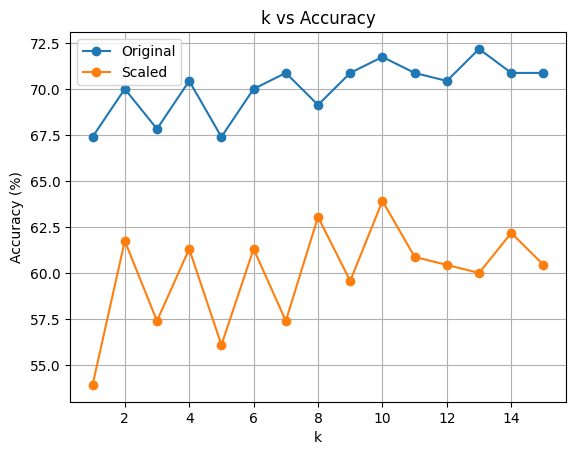

In [ ]:
plt.plot(k_values, acc_original, marker='o', label='Original')
plt.plot(k_values, acc_scaled, marker='o', label='Scaled')
plt.xlabel("k")
plt.ylabel("Accuracy (%)")
plt.title("k vs Accuracy")
plt.legend()
plt.grid()
plt.show()


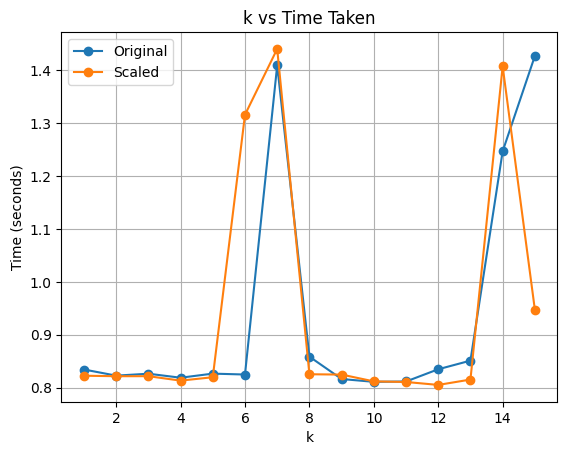

In [ ]:
plt.plot(k_values, time_original, marker='o', label='Original')
plt.plot(k_values, time_scaled, marker='o', label='Scaled')
plt.xlabel("k")
plt.ylabel("Time (seconds)")
plt.title("k vs Time Taken")
plt.legend()
plt.grid()
plt.show()


3. Analyze and Discuss:

• Discuss how the choice of k affects the accuracy and computational cost.

The value of k plays a crucial role in determining the performance of KNN classifier.


1.  Effects of k on Accuracy:

*   Small k(1 or 2):
    The model becomes highly sensitive, resulting in overfitting, and accuracy might fluctuate.
*   Moderate k(5 to 9): The model achieves better balance, predictions gets more stable and produces highest and most consistent accuracy.

*  Large k(>=12): The model becomes too generalized, important patterns may get ignored, and accuracy may decrease as k increses.

2. Effects of k on Computational Costs:
*  Increasing k doesnot reduce distance computing but increases the cost of sorting and voting.
* Larger k values results in slightly higher prediction time.





• Identify the optimal k based on your analysis.

The optimal k value is chosen based on:
* highest test accuracy
* stable performance
* reasonable prediction time

And from the experimental results:
* The optimal value of k lies between 5 and 9 i.e k = 7 for this dataset.
